# Reido Vidaya Mahardika

## Python Modeling Credit Scoring

### I. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

### II. Data Loading

In [2]:
# Load Dataset
df_ori = pd.read_csv(r'C:\Users\reido\OneDrive\Desktop\Job\Data\Talentport\Technical Test\ds-takehome\data\credit_scoring.csv')   

# Duplicate data
df = df_ori.copy()
df.head(5)

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020


### III. EDA

In [3]:
# Summary Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


In [4]:
df.describe()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


In [5]:
# Check Missing Value
df.isnull().sum().sum()

0

In [6]:
# Check Duplicated Data
df.duplicated().sum()

0

In [7]:
# Drop Column
df_clean = df.drop(columns=['application_id', 'leak_col_good', 'leak_col_subtle'])

### IV Feature Engineering

In [8]:
# Split X dan y
X = df_clean.drop(['default'], axis=1)
y = df_clean['default']
X.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score
0,41,13995609,5982664,0,624
1,58,13683833,3711198,0,809
2,33,9417391,7172332,0,647
3,45,6861811,8661056,0,450
4,22,5640742,4520669,1,816


In [9]:
# Split X train test dan y train test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=26)

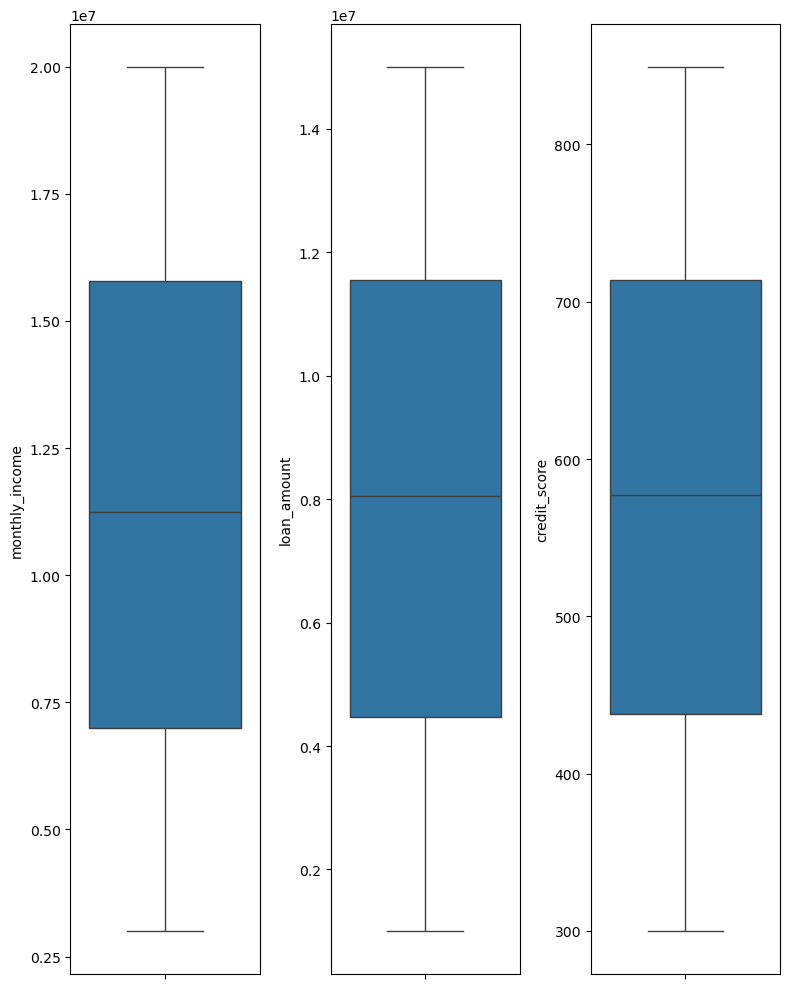

In [10]:
# Check Outliers

#Define Num Columns
num_columns = ['monthly_income', 'loan_amount', 'credit_score']

num = len(num_columns)
num_rows = 1
num_cols = 3

plt.figure(figsize=(8, 10))

# Membuat boxplot untuk setiap num_columns
for i, feature in enumerate(num_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=X_train, y=feature)

plt.tight_layout()
plt.show()

### V. Modeling

##### Logistic Regression 

In [11]:
logreg = make_pipeline(LogisticRegression())
logreg.fit(X_train, y_train)

# AUC Score
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print("Logistic Regression AUC:", roc_auc_score(y_test, y_pred_proba))

Logistic Regression AUC: 0.7925101214574898


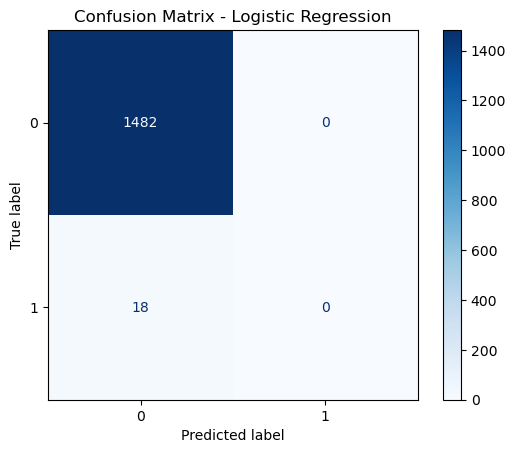

In [12]:
# Confusion Matrix
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

##### Gradient Boosting

In [13]:
# Gradient Boosting
gbc = make_pipeline(GradientBoostingClassifier())
gbc.fit(X_train, y_train)

# AUC Score
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
print("Gradient Boosting AUC:", roc_auc_score(y_test, y_pred_proba))



Gradient Boosting AUC: 0.7592592592592593


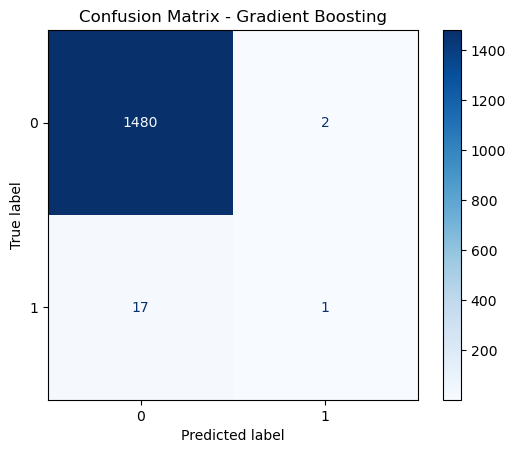

In [14]:
# Confusion Matrix
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Model gradient boosting dan logistic regression memiliki nilai AUC yang cukup tinggi namun untuk Logistic Regression memiliki nilai yang lebih tinggi. Ini bisa diakibatkan karena da beberapa parameter pada Gradient Boosting yang belum diatur. Dan dapat terlihatb juga pada confusion matrix Logistic Regression lebih unggul.

In [15]:
df_output = pd.DataFrame({
    'prob_default': y_pred_proba,
    'y_true': y_test.reset_index(drop=True)
})

##### Model Inference

In [16]:
df_inf = {'age' : 30,
          'monthly_income' : 10000000,
          'loan_amount' : 5000000,
          'previous_defaults': 0,
          'credit_score': 500}
df_inf = pd.DataFrame([df_inf])
df_inf

,age,monthly_income,loan_amount,previous_defaults,credit_score
0,30,10000000,5000000,0,500


In [17]:
# Lakukan prediksi
predictions = gbc.predict(df_inf)
print("Prediksi:", predictions)

Prediksi: [0]


## Score Card

In [18]:
def scorecard(prob, base_score=600, pdo=50):
    import numpy as np
    odds = prob / (1 - prob)
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(20)  # 20:1 odds = score 600
    return offset - factor * np.log(odds)

df_output['score'] = scorecard(df_output['prob_default'])

#### Save To csv

In [19]:
df_output.to_csv("model.csv", index=False)

### SHAP

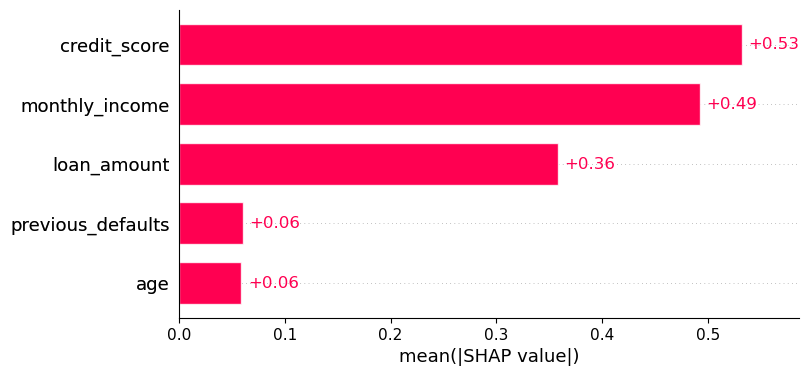

In [20]:
model = gbc.named_steps['gradientboostingclassifier']
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.bar(shap_values, max_display=10)

Dari Model SHAP diatas didapatkan credit_score merupakan fitur paling penting bisa dilihat berdasarkan nilainya +0.53